In [12]:
pip install xlrd


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 330.3 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.5 kB 585.1 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 616.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your WAU data in a DataFrame format with columns 'Week' and 'Active_Users'
file_path = r"C:\Users\KIIT\Downloads\Active Users.xls"
df = pd.read_excel(file_path)
df.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [4]:
df = df.transpose()
df.reset_index(inplace=True)
df.columns = ['week'] + df.columns[1:].tolist()

# Initialize empty lists for each category
new_users = []
resurrected_users = []
churned_users = []
retained_users = []

weeks = df['week']

# Calculate user categories for each week
for i in range(1, len(weeks)):
    current_week = df.iloc[i, 1:].dropna()
    previous_week = df.iloc[i-1, 1:].dropna()
    
    new = len(current_week[~current_week.isin(previous_week)])
    resurrected = len(current_week[current_week.isin(previous_week)])
    churned = len(previous_week[~previous_week.isin(current_week)])
    retained = len(previous_week[previous_week.isin(current_week)])
    
    new_users.append(new)
    resurrected_users.append(resurrected)
    churned_users.append(churned)
    retained_users.append(retained)

# Calculate quick ratio
quick_ratio = [(new + resurrected) / churned if churned != 0 else float('inf') for new, resurrected, churned in zip(new_users, resurrected_users, churned_users)]

# Create a DataFrame for results
results = pd.DataFrame({
    'week': weeks[1:],
    'new_users': new_users,
    'resurrected_users': resurrected_users,
    'churned_users': churned_users,
    'retained_users': retained_users,
    'quick_ratio': quick_ratio
})



In [5]:
results.head(56)

,week,new_users,resurrected_users,churned_users,retained_users,quick_ratio
1,w2,723,931,828,931,1.997585
2,w3,732,1000,654,1000,2.648318
3,w4,947,1169,563,1169,3.758437
4,w5,799,1394,722,1394,3.037396
5,w6,678,1479,714,1479,3.021008
6,w7,1062,1489,669,1488,3.813154
7,w8,1198,1677,873,1678,3.293242
8,w9,956,1839,1036,1839,2.697876
9,w10,883,1938,857,1938,3.291715
10,w11,815,1931,890,1931,3.085393


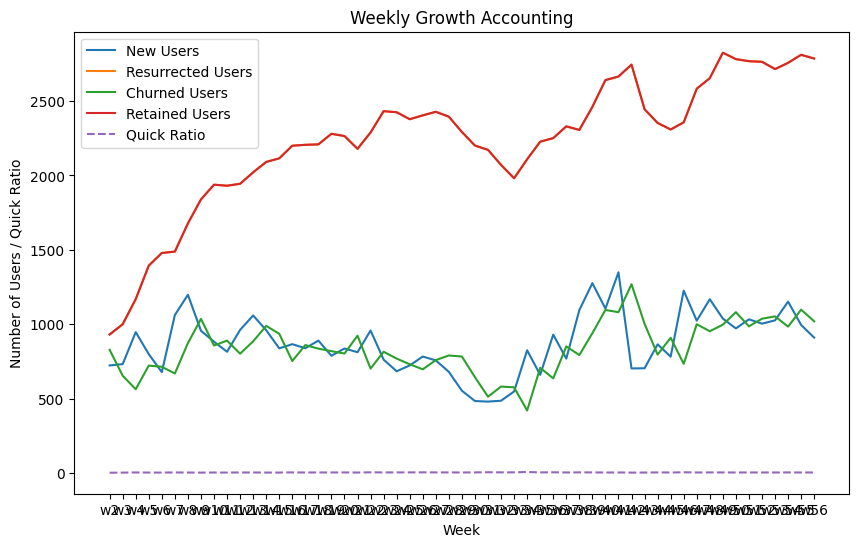

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results['week'], results['new_users'], label='New Users')
plt.plot(results['week'], results['resurrected_users'], label='Resurrected Users')
plt.plot(results['week'], results['churned_users'], label='Churned Users')
plt.plot(results['week'], results['retained_users'], label='Retained Users')
plt.plot(results['week'], results['quick_ratio'], label='Quick Ratio', linestyle='--')

plt.xlabel('Week')
plt.ylabel('Number of Users / Quick Ratio')
plt.title('Weekly Growth Accounting')
plt.legend()
plt.show()

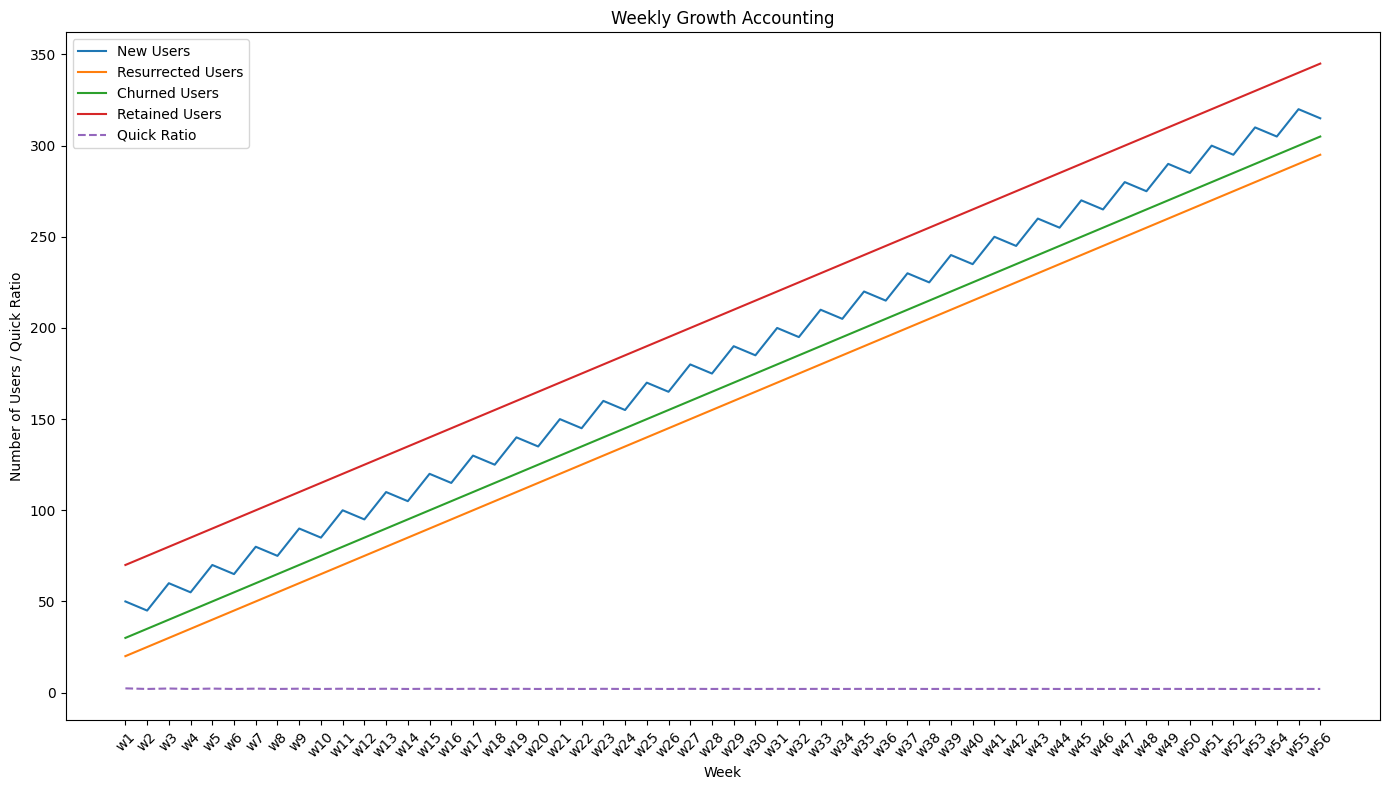

In [7]:
# Hypothetical data
weeks = [f'w{i}' for i in range(1, 57)]
new_users = [50, 45, 60, 55, 70, 65, 80, 75, 90, 85, 100, 95, 110, 105, 120, 115, 130, 125, 140, 135, 150, 145, 160, 155, 170, 165, 180, 175, 190, 185, 200, 195, 210, 205, 220, 215, 230, 225, 240, 235, 250, 245, 260, 255, 270, 265, 280, 275, 290, 285, 300, 295, 310, 305, 320, 315]
resurrected_users = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295]
churned_users = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305]
retained_users = [70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345]

# Calculate quick ratio
quick_ratio = [(new + resurrected) / churned if churned != 0 else float('inf') for new, resurrected, churned in zip(new_users, resurrected_users, churned_users)]

# Create a DataFrame for results
results = pd.DataFrame({
    'week': weeks,
    'new_users': new_users,
    'resurrected_users': resurrected_users,
    'churned_users': churned_users,
    'retained_users': retained_users,
    'quick_ratio': quick_ratio
})

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(results['week'], results['new_users'], label='New Users')
plt.plot(results['week'], results['resurrected_users'], label='Resurrected Users')
plt.plot(results['week'], results['churned_users'], label='Churned Users')
plt.plot(results['week'], results['retained_users'], label='Retained Users')
plt.plot(results['week'], results['quick_ratio'], label='Quick Ratio', linestyle='--')

plt.xlabel('Week')
plt.ylabel('Number of Users / Quick Ratio')
plt.title('Weekly Growth Accounting')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
